In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print(train_df.head())
print(test_df.head())


   id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.3198

(524164, 11) (174722, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
None
                  id    RhythmScore  AudioLoudness   VocalContent

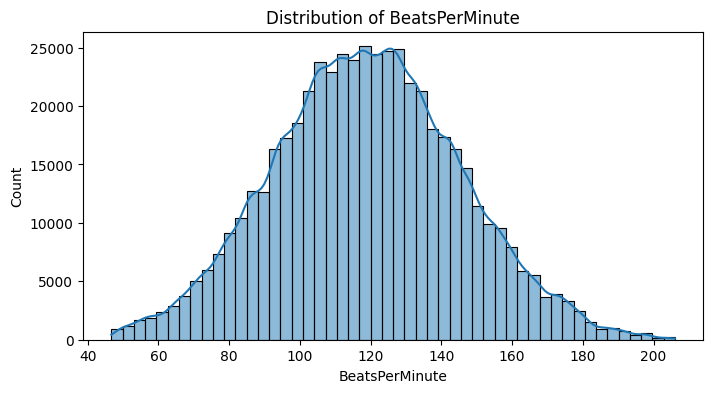

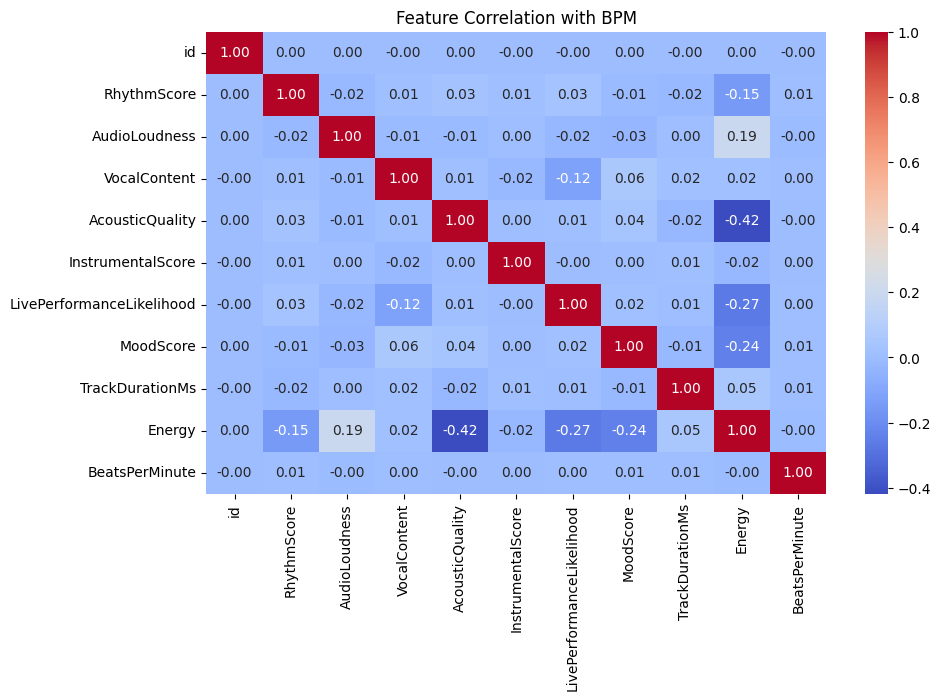

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset info
print(train_df.shape, test_df.shape)
print(train_df.info())
print(train_df.describe())

# Check missing values
print(train_df.isnull().sum())

# Distribution of target (BPM)
plt.figure(figsize=(8,4))
sns.histplot(train_df['BeatsPerMinute'], bins=50, kde=True)
plt.title("Distribution of BeatsPerMinute")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with BPM")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = train_df.drop(columns=["id", "BeatsPerMinute"])
y = train_df["BeatsPerMinute"]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df.drop(columns=["id"]))


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42),  # parallel + fewer trees
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42)       # fewer trees for speed
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    results[name] = {"MAE": mae, "RMSE": rmse}
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}")


Training Linear Regression...
Linear Regression: MAE=21.18, RMSE=26.44
Training Random Forest...
Random Forest: MAE=21.38, RMSE=26.68
Training Gradient Boosting...
Gradient Boosting: MAE=21.18, RMSE=26.44


In [10]:
best_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
best_model.fit(scaler.fit_transform(X), y)

# Predict on test set
test_preds = best_model.predict(X_test_scaled)


In [ ]:
submission = pd.DataFrame({
    "ID": test_df["id"],           
    "BeatsPerMinute": test_preds   
})

submission.to_csv("submission.csv", index=False)  # save as CSV
print(submission.head())  # preview first 5 rows


       ID  BeatsPerMinute
0  524164      119.496413
1  524165      118.282902
2  524166      119.597475
3  524167      119.303322
4  524168      119.464071
